# Домашняя работа

## Задание 1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("student-mat.csv", delimiter=';')

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Выведем в отдельные переменные средние оценки первых 50 и 20 студентов

In [4]:
average_50 = (df["G1"].iloc [0:50]+df["G2"].iloc [0:50])/2
average_20 = (df["G1"].iloc [0:20]+df["G2"].iloc [0:20])/2

Построим доверительные интервалы для 50 и 20 студентов. Выбор распределения будет зависеть от размера выборки, если больше 30 - выберем нормальное распределение, если меньше или равно 30 - t-распределение

In [5]:
interval_50 = stats.norm.interval(confidence = 0.99, loc = average_50.mean(), scale = stats.sem(average_50))

In [6]:
interval_50

(10.339546922544232, 12.96045307745577)

In [7]:
interval_20 = stats.t.interval(confidence = 0.99, df=len(average_20)-1, loc = average_20.mean(), scale = stats.sem(average_20))

In [8]:
interval_20

(8.281332461523021, 13.168667538476978)

При увеличении выборки до 100 доверительный интервал уменьшится, т.к. чем больше данных, тем точнее результат. Проверим и подтвердим это

In [9]:
average_100 = (df["G1"].iloc [0:100]+df["G2"].iloc [0:100])/2
stats.norm.interval(confidence = 0.99, loc = average_100.mean(), scale = stats.sem(average_100))

(10.255193814396383, 11.934806185603618)

Как мы видим, доверительный интервал стал меньше, чем при 20 или 50 студентах

Визуализируем полученные интервалы

([<matplotlib.axis.XTick at 0x1e3ecb9f6a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

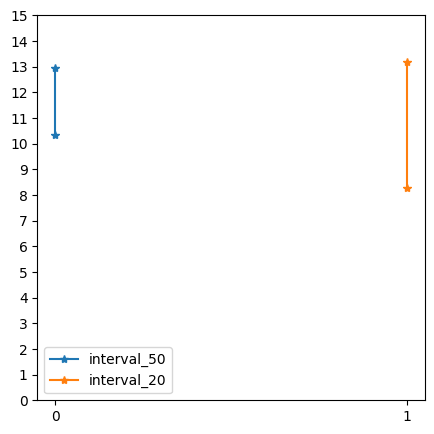

In [10]:
x = [0,0]
x_1 = [1,1]
plt.figure(figsize=(5, 5))
plt.plot(x, interval_50, marker='*', label='interval_50')
plt.plot(x_1, interval_20, marker='*', label='interval_20')
plt.legend()
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.xticks([0, 1])

## Задание 2

In [11]:
from IPython.core.display import Image

Возьмём одну из формул, данных на лекции. Исходя из неё вычислим объём выборки

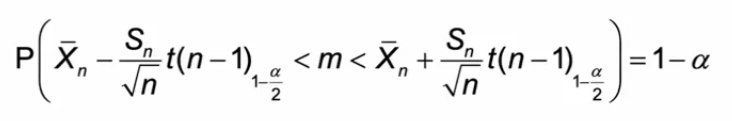

In [12]:
Image("interval.png", width=520, height=240)

Объём выборки = ((стандартное отклонение * t-критерий * 2)/ ширину интервала)**2

In [13]:
average = (df["G1"]+df["G2"])/2

In [14]:
n = ((2 * average.std() * 1.96)/4)**2 # подставим значение 1.96 вместо t по таблице и значение 4 ширины по условию

In [15]:
n

11.15111843731928

Получается, чтобы ширина доверительного интервала не привышала 4, нам нужно брать объём выборки n >=12 (больше либо равно 12)

## Задание 3

In [16]:
df_1 = pd.read_csv("student-por.csv", delimiter=';')

In [33]:
df_1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [81]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Для построения интервала возьмём в датасете с португальским языком только первые 395 значений, т.к. таково количество строк датасета с оценками по математике

In [17]:
difference = df["G3"]-df_1["G3"].iloc[0:395]

In [18]:
stats.norm.interval(confidence = 0.95, loc = difference.mean(), scale = stats.sem(difference))

(-2.507726364269929, -1.5834128762364)

В целом, чем больше выборка, тем меньше доверительный интервал. В данном случае, т.к. датасет с португальским языком больше, то при увеличении выборки с оценками по математике интервал уменьшится, т.к. для них будут соответствующие оценки из другого датасета, а если увеличить только датасет с португальским, то это не приведёт к изменению интервала